## Data Preprocessing

In [141]:
import os
import numpy as np
from os import listdir
from matplotlib.pyplot import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Settings:
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2


def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img


def get_dataset(dataset_path='Dataset'):
    # Getting all data from data path:
    try:
        X = np.load('npy_dataset/X.npy')
        Y = np.load('npy_dataset/Y.npy')
    except:
        labels = ['0','1','2','3','4','5','6','7','8','9']  # Geting labels
        X = []
        Y = []
        for i, label in enumerate(labels):
            datas_path = dataset_path + '/' + label
            for data in listdir(datas_path):
                img = get_img(datas_path + '/' + data)
                X.append(img)
                Y.append(i)
        # Create dateset:
        X = np.array(X).astype('float32')
        Y = np.array(Y).astype('float32')
        Y = to_categorical(Y, num_class)
        if not os.path.exists('npy_dataset/'):
            os.makedirs('npy_dataset/')
        np.save('npy_dataset/X.npy', X)
        np.save('npy_dataset/Y.npy', Y)
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    return X, X_test, Y, Y_test


X, X_test, Y, Y_test = get_dataset()

# import os
# import numpy as np
# from os import listdir
# from matplotlib.pyplot import imread
# from skimage.transform import resize
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split


# # Settings:
# img_size = 64
# grayscale_images = True
# num_class = 10
# test_size = 0.2

# from PIL import Image
# def get_img(data_path):
#     # Getting image array from path:
#     # print("=====================================================")
#     # print(type(imread(data_path)))
#     img = Image.open(data_path)
#     # print(type(np.array(img).astype("float32")))
#     # img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
#     return img.convert("L")


# def get_dataset(dataset_path='Dataset'):
#     # Getting all data from data path:
#     try:
#         X = np.load('npy_dataset/X.npy')
#         Y = np.load('npy_dataset/Y.npy')
#     except:
#         labels = ['0','1','2','3','4','5','6','7','8','9']  # Geting labels
#         X = []
#         Y = []
#         for i, label in enumerate(labels):
#             datas_path = dataset_path + '/' + label
#             for data in listdir(datas_path):
#                 img = get_img(datas_path + '/' + data)
#                 X.append(np.array(img).astype("float32") / 255.0)
#                 Y.append(i)
#         # Create dateset:
#         X = np.asarray(X)
#         Y = np.array(Y).astype('float32')
#         Y = to_categorical(Y, num_class)
#         if not os.path.exists('npy_dataset/'):
#             os.makedirs('npy_dataset/')
#         np.save('npy_dataset/X.npy', X)
#         np.save('npy_dataset/Y.npy', Y)
#     X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
#     return X, X_test, Y, Y_test


# X, X_test, Y, Y_test = get_dataset()


## Imports

In [142]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
y = np.argmax(Y, axis=1)
y_test = np.argmax(Y_test, axis=1)
y.shape
print(X.shape)
print(X[0].shape)
print(type(X))
print(type(X[0]))

(1649, 64, 64, 1)
(64, 64, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [143]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report
y = np.argmax(Y, axis=1)
y_test = np.argmax(Y_test, axis=1)
y.shape
print(type(X[0]))

<class 'numpy.ndarray'>


In [144]:
def visualize_image_gray(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image, cmap=plt.cm.binary)

In [145]:
def visualize_image_rgb(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)

## Images Visualization

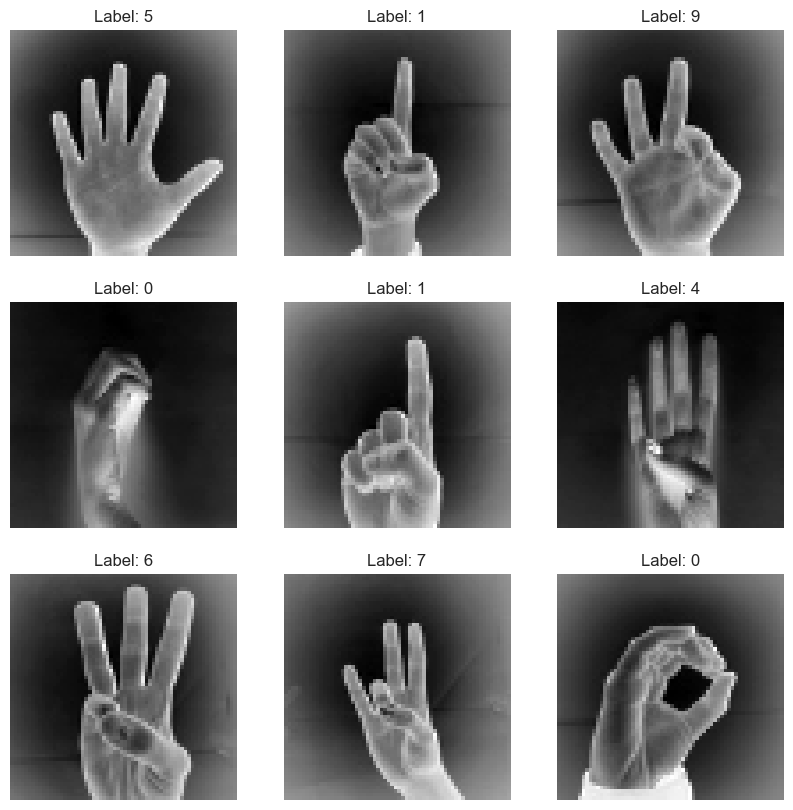

In [146]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image_gray(X[i * 100], label="Label: " + str(y[i * 100]))

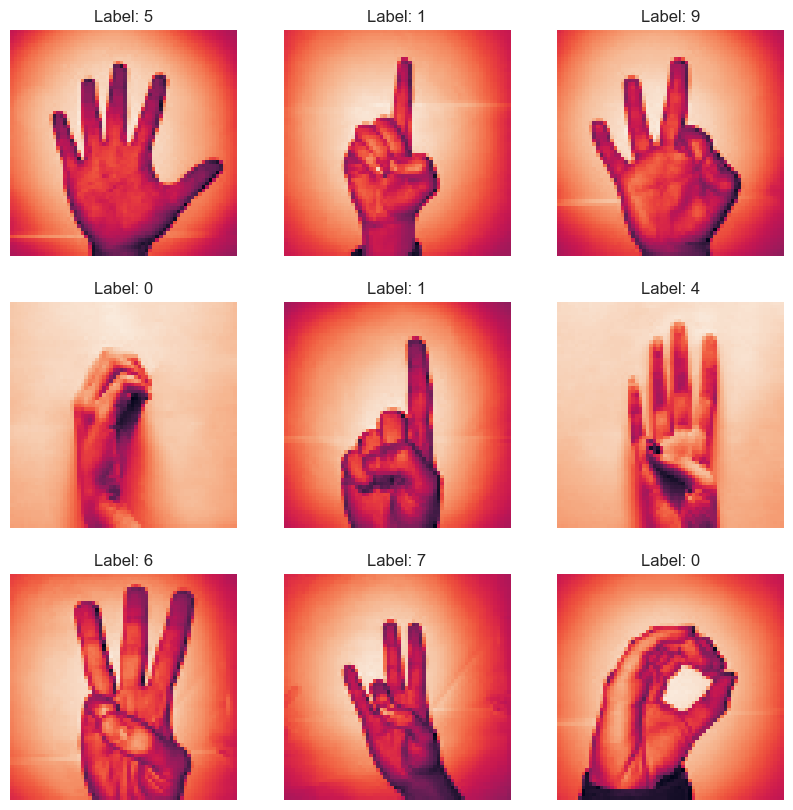

In [147]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image_rgb(X[i * 100], label="Label: " + str(y[i * 100]))

## Cross Validation function

In [ ]:
def applyCrossValidation(model, X, Y, num_folds=5):
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(X, Y):
    model.fit(X[train], Y[train], batch_size=32, epochs=10, callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=7,
            restore_best_weights=True
        )])
    scores = model.evaluate(X[test], Y[test], verbose=2)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    fold_no += 1
    # acc_per_fold.append(scores[1] * 100)
    # loss_per_fold.append(scores[0])

## Preparing model

In [186]:
inputs = tf.keras.Input(shape=(img_size, img_size, 1))

conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(inputs)
pool1 = tf.keras.layers.AveragePooling2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(pool1)
pool2 = tf.keras.layers.AveragePooling2D()(conv2)

flatten = tf.keras.layers.Flatten()(pool2)

dense1 = tf.keras.layers.Dense(units=120, activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(units=84, activation='relu')(dense1)

outputs = tf.keras.layers.Dense(units=10, activation='softmax')(dense2)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

## Training

In [188]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# history = model.fit(
#     X,
#     y,
#     validation_split=0.2,
#     batch_size=32,
#     epochs=100,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=5,
#             restore_best_weights=True
#         )
#     ]
# )
applyCrossValidation(model, X, y, 3)

Epoch 1/10
35/35 [==============================] - 1s 28ms/step - loss: 2.2501 - accuracy: 0.1911
Epoch 2/10
35/35 [==============================] - 1s 28ms/step - loss: 1.6604 - accuracy: 0.4550
Epoch 3/10
35/35 [==============================] - 1s 29ms/step - loss: 0.9787 - accuracy: 0.6833
Epoch 4/10
35/35 [==============================] - 1s 30ms/step - loss: 0.6842 - accuracy: 0.7707
Epoch 5/10
35/35 [==============================] - 1s 29ms/step - loss: 0.5768 - accuracy: 0.8180
Epoch 6/10
35/35 [==============================] - 1s 29ms/step - loss: 0.4859 - accuracy: 0.8581
Epoch 7/10
35/35 [==============================] - 1s 28ms/step - loss: 0.4312 - accuracy: 0.8799
Epoch 8/10
35/35 [==============================] - 1s 28ms/step - loss: 0.3871 - accuracy: 0.8908
Epoch 9/10
35/35 [==============================] - 1s 29ms/step - loss: 0.3558 - accuracy: 0.9017
Epoch 10/10
35/35 [==============================] - 1s 27ms/step - loss: 0.2431 - accuracy: 0.9354
18/18 - 0

## Evaluating

In [189]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Test Loss: 0.60799
Test Accuracy: 88.38%


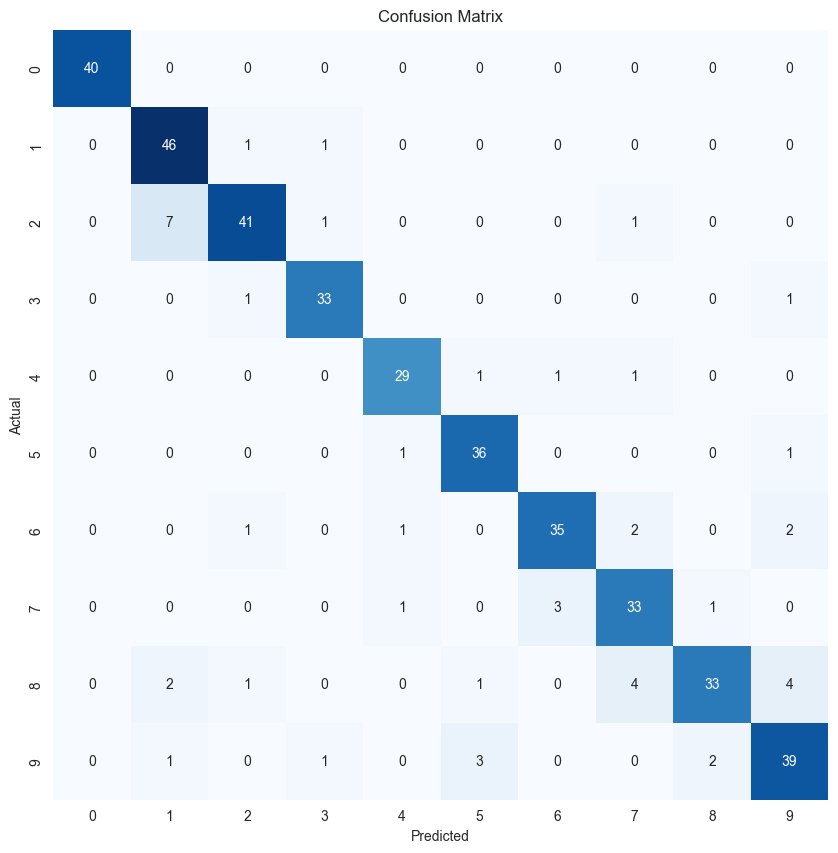

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.82      0.96      0.88        48
           2       0.91      0.82      0.86        50
           3       0.92      0.94      0.93        35
           4       0.91      0.91      0.91        32
           5       0.88      0.95      0.91        38
           6       0.90      0.85      0.88        41
           7       0.80      0.87      0.84        38
           8       0.92      0.73      0.81        45
           9       0.83      0.85      0.84        46

    accuracy                           0.88       413
   macro avg       0.89      0.89      0.89       413
weighted avg       0.89      0.88      0.88       413



In [190]:
evaluate_model(model, X_test, y_test)

In [191]:
y_pred = np.argmax(model.predict(X_test), axis=1)
pred = model.predict(X_test)

In [192]:
pred[0]

array([2.1640121e-06, 2.9286562e-12, 1.8491356e-08, 5.4577686e-07,
       9.6485174e-01, 1.6277789e-05, 7.1302098e-03, 2.3945954e-02,
       2.5831186e-03, 1.4698859e-03], dtype=float32)

# ANN

In [200]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2 , random_state = 42)
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_class, activation=tf.nn.softmax)
])

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# model1.fit(X, Y, batch_size=32, validation_data=[X_val, Y_val], epochs=30, callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=7,
#             restore_best_weights=True
#         )
#     ])
applyCrossValidation(model1, X, Y, 3)

Epoch 1/10


c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


35/35 [==============================] - 1s 10ms/step - loss: 2.9217 - accuracy: 0.1274
Epoch 2/10
35/35 [==============================] - 0s 10ms/step - loss: 2.3137 - accuracy: 0.1219
Epoch 3/10
35/35 [==============================] - 0s 12ms/step - loss: 2.2893 - accuracy: 0.1201
Epoch 4/10
35/35 [==============================] - 0s 10ms/step - loss: 2.2621 - accuracy: 0.1492
Epoch 5/10
35/35 [==============================] - 0s 10ms/step - loss: 2.2458 - accuracy: 0.1565
Epoch 6/10
35/35 [==============================] - 0s 10ms/step - loss: 2.2435 - accuracy: 0.1456
Epoch 7/10
35/35 [==============================] - 0s 10ms/step - loss: 2.1727 - accuracy: 0.1747
Epoch 8/10
35/35 [==============================] - 0s 10ms/step - loss: 2.1776 - accuracy: 0.1529
Epoch 9/10
35/35 [==============================] - 0s 10ms/step - loss: 2.2309 - accuracy: 0.1474
Epoch 10/10
35/35 [==============================] - 0s 10ms/step - loss: 2.2148 - accuracy: 0.1538
18/18 - 0s - loss: 2

In [206]:
# score = model1.evaluate(X_test, Y_test)
# print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))
y_pred = np.argmax(model1.predict(X_test), axis=1)
clr = classification_report(np.argmax(Y_test, axis=1), y_pred)
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.83      0.38      0.52        40
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        50
           3       0.27      0.71      0.39        35
           4       0.06      0.06      0.06        32
           5       0.00      0.00      0.00        38
           6       0.00      0.00      0.00        41
           7       0.13      0.89      0.23        38
           8       0.00      0.00      0.00        45
           9       0.18      0.07      0.10        46

    accuracy                           0.19       413
   macro avg       0.15      0.21      0.13       413
weighted avg       0.14      0.19      0.12       413



c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  # tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  # tf.keras.layers.Dense(128, activation=tf.nn.relu),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  # tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(32, activation=tf.nn.relu),
  # tf.keras.layers.Dense(32, activation=tf.nn.relu),
  # tf.keras.layers.Dense(16, activation=tf.nn.relu),
  tf.keras.layers.Dense(num_class, activation=tf.nn.softmax)
])

model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# model2.fit(X, Y, batch_size=32, validation_data=[X_val, Y_val], epochs=100, callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=7,
#             restore_best_weights=True
#         )
#     ])
applyCrossValidation(model2, X, Y, 3)

Epoch 1/10
35/35 [==============================] - 1s 11ms/step - loss: 2.4842 - accuracy: 0.0965
Epoch 2/10
35/35 [==============================] - 0s 11ms/step - loss: 2.3401 - accuracy: 0.0983
Epoch 3/10
35/35 [==============================] - 0s 13ms/step - loss: 2.2957 - accuracy: 0.1483
Epoch 4/10
35/35 [==============================] - 0s 12ms/step - loss: 2.2563 - accuracy: 0.1401
Epoch 5/10
35/35 [==============================] - 0s 14ms/step - loss: 2.2262 - accuracy: 0.1747
Epoch 6/10
35/35 [==============================] - 0s 12ms/step - loss: 2.1618 - accuracy: 0.2138
Epoch 7/10
35/35 [==============================] - 0s 13ms/step - loss: 2.0433 - accuracy: 0.2466
Epoch 8/10
35/35 [==============================] - 0s 12ms/step - loss: 2.0073 - accuracy: 0.2766
Epoch 9/10
35/35 [==============================] - 0s 12ms/step - loss: 1.9282 - accuracy: 0.3003
Epoch 10/10
35/35 [==============================] - 0s 13ms/step - loss: 1.7467 - accuracy: 0.3740
18/18 - 0

In [207]:
# score = model2.evaluate(X_test, Y_test)
# print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))
y_pred = np.argmax(model2.predict(X_test), axis=1)
clr = classification_report(np.argmax(Y_test, axis=1), y_pred)
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.94      0.82      0.88        40
           1       0.89      0.71      0.79        48
           2       0.78      0.62      0.69        50
           3       0.96      0.66      0.78        35
           4       0.51      0.62      0.56        32
           5       0.77      0.87      0.81        38
           6       0.88      0.51      0.65        41
           7       0.31      0.79      0.44        38
           8       0.55      0.27      0.36        45
           9       0.66      0.72      0.69        46

    accuracy                           0.65       413
   macro avg       0.72      0.66      0.67       413
weighted avg       0.73      0.65      0.67       413



## SVM

In [ ]:
from sklearn.svm import SVC

model_linear = SVC(kernel='linear')
model_linear.fit(X, y)

y_pred = model_linear.predict(X_test)


ValueError: Found array with dim 4. SVC expected <= 2.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

results = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()